# COMP47670 Assignment 2: Flight Delay Analysis
This notebook contains all tasks associated with COMP47670 Data Science in Python Assignment 2.

## Task 1: Data Preperation & Characterisation 

### Dataset Combination

In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Load Flight Data into a pandas DataFrame
scheduled_flights_info = pd.read_csv("data/flights_schedule.csv")
# Load weather conditions into a pandas DataFrame
weather_condition_df = pd.read_csv("data/flight_conditions_outcomes.csv")
# Merge the two dataframes on "flight_id" column
flight_info_df = pd.merge(weather_condition_df, scheduled_flights_info, how="inner", on="flight_id")

In [3]:
flight_info_df.to_csv("data/merged_dataset.csv")

### Data Cleaning
For each column in the DataFrame lets:
- Verify input is uniform.
- Convert to an appropriate data type.

In [4]:
flight_info_df.dtypes

flight_id         object
precipitation     object
wind              object
dep_delay          int64
flight_date       object
sched_dep_time    object
sched_arr_time    object
carrier_code      object
carrier           object
flight_number     object
origin            object
origin_name       object
origin_city       object
origin_country    object
dest              object
dest_name         object
dest_city         object
dest_country      object
distance_km        int64
aircraft_type     object
dtype: object

#### flight_id
This is the unique identifier for each flight in our dataset. Each entry should be stored as a string data type.

In [5]:
# Convert all entries to a string data type
flight_info_df["flight_id"] = flight_info_df["flight_id"].astype("string")

#### precipitation
This column contains categorical data refering to the precipitation on the day of each flight. Entries in this column take the following format:
- "Dry"
- "Light"
- "Moderate"
- "Heavy"

Since these categories have a natural order of precipitation intensity, lets convert the following:

- Dry -> 0
- Light -> 1
- Moderate -> 2
- Heavy -> 3

In [6]:
# Define a precipitation mapping dictionary
precipitation_mapping = {"Dry" : 0, "Light": 1, "Moderate": 2, "Heavy" : 3}

# Apply the precipitation mapping dictionary.
flight_info_df["precipitation"] = flight_info_df["precipitation"].map(precipitation_mapping)

#### wind
This column contains categorical data regarding the wind on the day of each flight. Lets perform the same preprocessing as the "precipitation" column. Entries in the column are of the following format:
- Calm
- Breezy
- Windy
- VeryWindy
  
Since there is a natual order of wind intensity lets convert the following:
- Calm -> 0
- Breezy -> 1
- Windy -> 2
- VeryWindy -> 3 

In [7]:
# Define a wind intensity mapping dictionary
wind_intensity_mapping = {"Calm" : 0, "Breezy" : 1, "Windy" : 2, "VeryWindy" : 3}

# Apply mapping dictionary
flight_info_df["wind"] = flight_info_df["wind"].map(wind_intensity_mapping)

#### dep_delay

This column contains the number of minutes the departure of each flight is delayed in minutes. Entries of this columna are already of data type int so no preprocessing is required.

In [8]:
flight_info_df["dep_delay"].dtype

dtype('int64')

#### flight_date & sched_dep_time
These two columns represent the date and time of the scheduled departure of each flight in the data set. To enable time based analysis and comparision lets merge these two columns into a "scheduled_departure" column that uses the "flight_date" and "sch"

In [9]:
# Combine the scheduled departure date and time columns into a new Pandas Series. 
combined_departure_date_and_time = flight_info_df["flight_date"] + " " + flight_info_df["sched_dep_time"]

# Create a new column in the flight_info_df dateframe called "scheduled_departures" with 
# DateTime objects and remove "flight_date" and "sched_dep_time" columns.
flight_info_df["scheduled_departure"] = pd.to_datetime(combined_departure_date_and_time, format="%Y-%m-%d %H:%M", errors="coerce")

#### sched_arr_time
This column represents the scheduled arrival time for each flight in the dataset. Lets combine this time data with the date data from the "flight_date" column to create a new column called "scheduled_arrival" which will comprise entries of DateTime objects of the following format:


%Y-%m-%d %H:%M

In [10]:
# Combine the scheduled arrival date and time columns into a new Pandas Series. 
combined_arrival_date_and_time = flight_info_df["flight_date"] + " " + flight_info_df["sched_arr_time"]

# Create a new column in the flight_info_df dateframe called "scheduled_arrival" with 
# DateTime objects and remove "flight_date" and "sched_arr_time" columns.
flight_info_df["scheduled_arrival"] = pd.to_datetime(combined_arrival_date_and_time, format="%Y-%m-%d %H:%M", errors="coerce")

The columns flight_date, sched_dep_time, and sched_arr_time are now no longer needed, so lets remove them from our dataframe.

In [11]:
# Define a list of columns to drop
columns_to_drop = ["flight_date","sched_dep_time","sched_arr_time"]

# Drop the columns from the dataframe
flight_info_df = flight_info_df.drop(columns_to_drop, axis=1)

#### carrier_code

This column contains the a two digit code representing the airline operating each flight in our dataset. This column is redundent since the column "carrier_code" also exists in the dataframe representing the airline operating each flight. Lets now drop the "carrier_code" column from the dataframe.

In [12]:
# Drop column from the DataFrame
flight_info_df = flight_info_df.drop("carrier_code", axis=1)

#### carrier

This column represents the airline operating each flight in the dataset. Lets convert all entries to a string data type.

In [13]:
flight_info_df["carrier"] = flight_info_df["carrier"].astype("string")

#### flight_number

This column contains identification information about each flight in the dataset. Since this column is not a unique identifier for each flight, this descriptive feature doesn't serve any purpose in the context of predicting flight delays. Lets nows remove this column from our DataFrame.

In [14]:
# Drop column from the DataFrame
flight_info_df = flight_info_df.drop("flight_number", axis=1)

#### origin

This column contains information about the origin of each flight in the dataset. Each entry is a three letter code perpresenting the city the flight departs from. The column "origin_name" already exists in the dataframe and is comprised of a more complete description of origin location. Since we have two columns describing the same thing lets remove the "origin" column in favour of the "origin_name" column. 

In [15]:
# Drop column from the DataFrame
flight_info_df = flight_info_df.drop("origin", axis=1)

#### origin_name

This column contains descriptive information about the origin airport of each flight in the dataset. Lets convert each entry into a string data type.

In [16]:
flight_info_df["origin_name"] = flight_info_df["origin_name"].astype("string")

#### origin_city

This column contains descriptive information about the origin city of each flight in the dataset. Lets convert each entry into a string data type.

In [17]:
flight_info_df["origin_city"] = flight_info_df["origin_city"].astype("string")

#### origin_country

This column contains descriptive information about the origin county of each flight in the dataset. Lets convert each entry into a string data type.

In [18]:
flight_info_df["origin_country"] = flight_info_df["origin_country"].astype("string")

#### dest

This columns is similiar to the "origin" column that was removed earlier. This column contains a three letter description of the destination of each flight in the dataset. It is safe to remove this column in favour of the "dest_name" column which provides a richer description of destination location.

In [19]:
flight_info_df = flight_info_df.drop("dest",axis=1) 

#### dest_name

This column provides a description of the destination airport of each flight in the dataset. Lets convert each entry to a string data type.

In [20]:
flight_info_df["dest_name"] = flight_info_df["dest_name"].astype("string")

#### dest_city

This column provides a description of the destination city of each flight in the dataset. Lets convert each entry to a string data type.

In [21]:
flight_info_df["dest_city"] = flight_info_df["dest_city"].astype("string")

#### dest_country

This column provides a description of the destination country of each flight in the dataset. Lets convert each entry to a string data type.

In [22]:
flight_info_df["dest_country"] = flight_info_df["dest_country"].astype("string")

#### distance_km

This column provides a description of the distance of each flight in the dataset in kilometers. Each entry is already converted to an integer data type so no preprocessing is necessary for this column.

#### aircraft_type

This column provides a categorical description of the aircraft type of each flight in the dataset. Lets convert each entry to a string data type.

In [23]:
flight_info_df["aircraft_type"] = flight_info_df["aircraft_type"].astype("string")

### Derived Features

Now that the original dataset has been preprocessed, it is important to derive deatures that will enhance the classification algorithms analysis. This section will outline a number of derived features that will be added to the dataset and why they will be useful.

#### 1. Binary Classification of Delay

Lets assume any flight with a value of "dep_delay" >= 15 to be delayed. Lets create a binary classification for this outcome and add it to the dataframe.

In [24]:
# Create a new column called "delayed".
# If the value for "dep_delay" >= 15 then the flight will be classified as delayed.
# A value of 1 will be added to the "delayed" column.

# If the value for "dep_delay" < 15 then the flight will be classified as not delayed.
# A value of 0 will be added to the "delayed" column.

flight_info_df["delayed"] = (flight_info_df["dep_delay"] >= 15).astype(int)

####  2. Time-Based Features from Scheduled Departures

My intuition leads me to believe that both time of day, day of the week, and possible month of the year could be strong predictors of delays. Lets create 3 new columns:
- departure_hour
- departure_day
- departure_month

In [25]:
# Create new column with the hour of day for the scheduled departure.

flight_info_df["departure_hour"] = flight_info_df["scheduled_departure"].dt.hour

# Create new column with the day of week for the scheduled departure.

flight_info_df["departure_dayofweek"] = flight_info_df["scheduled_departure"].dt.dayofweek

# Create new column with the month of year for the scheduled departure.

flight_info_df["departure_month"] = flight_info_df["scheduled_departure"].dt.month

#### 3. Flight Duration

Lets compute the flight duration in minutes and add it as its own column to the dataframe.

In [26]:
# Handle next-day arrivals
arrival_adjusted = flight_info_df["scheduled_arrival"].where(
    flight_info_df["scheduled_arrival"] >= flight_info_df["scheduled_departure"],
    flight_info_df["scheduled_arrival"] + pd.Timedelta(days=1)
)

# Calculate flight duration in minutes
flight_info_df["flight_duration_mins"] = (
    (arrival_adjusted - flight_info_df["scheduled_departure"])
    .dt.total_seconds() / 60
)

#### 4. Weather Condition Encoding

It might also be useful to add a "bad_weather" flag. Lets say the weather is "bad" if there the precipitation level or wind level is greater than or equal to 2. 

In [27]:
# If the values in the "precipitation" or "wind" column are >= 2 then the "bad_weather" flag will
# be set to 1, 0 otherwise.

flight_info_df["bad_weather"] = ((flight_info_df["precipitation"] >= 2) |
                                 (flight_info_df["wind"]  >= 2)).astype(int)

#### 5. Origin Flight Count

Lets add the total number of flight that are scheduled to depart from that airport for each flight in the dataset.

In [28]:
flight_info_df["origin_flight_count"] = flight_info_df.groupby("origin_name")["flight_id"].transform("count")

#### 6. Peak Traffic Indicators

Leets define the peak traffic times as 6-9 am and 4-7 pm and add a binary classification category to the dataframe.

In [29]:
# Set the new peak_hour_departure column to 1 if the flight schedules to depart between 6-9 am
# or 4-7 pm, 0 otherwise.

flight_info_df["peak_hour_departure"] = ((flight_info_df["departure_hour"].between(6,9)) | 
                                         (flight_info_df["departure_hour"].between(16,19))).astype(int)


### Data Characterisation

This section will explore and describe the dataset before we begin to apply our classification algorithms. This section will be broken down into the following sections:
- Dataset Overview
- Key Variable Distributions
- Visualisation
- Trends and Observations
- Future Modelling Work

#### Dataset Overview

We now have a dataframe containing the following features:
- **flight_id** - A unique identifier for each flight in the dataset
- **precipitation** - A numeric range of values representation precipitation intenstiy from 0-3
- **wind** - A numeric range of values representation wind intenstiy from 0-3
- **dep_delay** - The departure delay in minutes
- **carrier** - Flight Operator
- **origin_name** - Name of departure airport
- **origin_city** - Name of departure city
- **origin-country** - Name of departure country
- **dest_name** - Name of destination airport
- **dest-city** - Name of destination city
- **dest-country** - Name of destination country
- **scheduled_departure** - DateTime object representing the scheduled departure date and time
- **scheduled_arrival** - DateTime object representing the scheduled arrival date and time
- **delayed** - Binary classification if the flight suffered a delayed departure (> 15 mins past scheduled departure time)
- **departure_hour** - The 24 hour clock representation of the scheduled hour of departure
- **departure_dayofweek** - An integer representation of day of departure (0 for Monday, 1 for Tuesday, etc..)
- **departure_month** - An integer representation of month of departure (0 for January, 1 for February, etc..)
- **flight_duration_mins** - Flight duration in minutes
- **bad_weather** - A binary representation of if the flight suffered from bad weather (1 == true, 0 == false). A flight suffered from "bad weather" if either the wind or precipitation levels were >= 2. 
- **origin_flight_count** - The total number of flights in the dataser that departed from the flights airport.
- **peak_hour_departure** - A binary representation of if the flight departed during "peak hours". A flight is said to have departed during peak hours if the flights scheduled departure was between 6-9 am or 4-7 pm.

#### Key Variable Distribution

This section will discuss how the key feature (delayed and non-delayed flights) is distributed in the dataset.

##### Count Plot

Lets define a count plot to show the number of delayed and non delayed flights in the dataset.

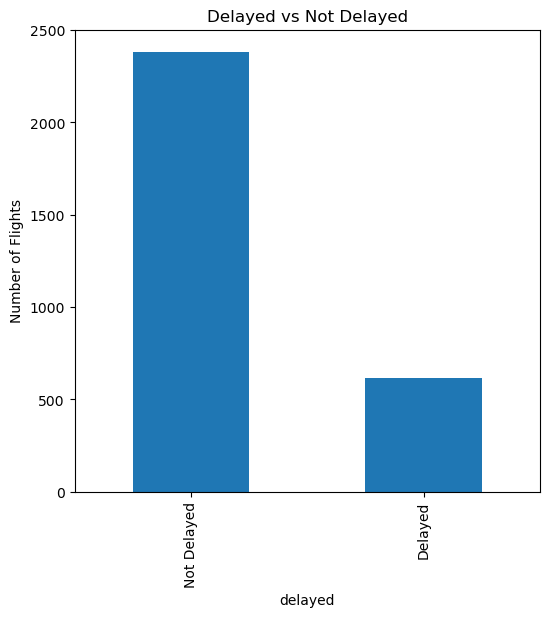

In [30]:
flight_info_df["delayed"].replace({0: "Not Delayed", 1: "Delayed"}).value_counts().plot(
    kind="bar",
    figsize=(6, 6),
    ylabel="Number of Flights"
)
plt.title("Delayed vs Not Delayed")
plt.show()

##### Pie Chart

Lets create a simple pie chart to visualise the amount of delayed and not delayed flights in the dataset. This will provide an overview of the distribuition of delayed and non-delayed flights within the dataset.

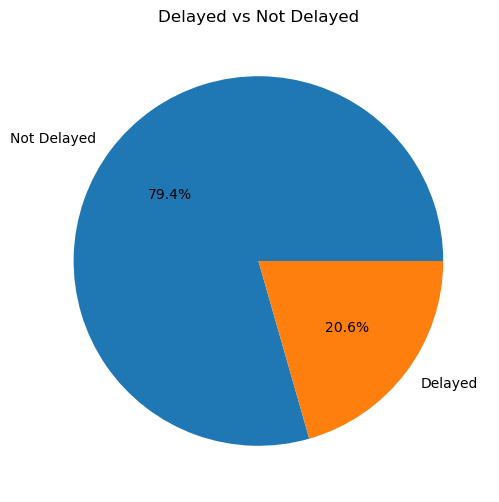

In [31]:
flight_info_df["delayed"].replace({0: "Not Delayed", 1: "Delayed"}).value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    ylabel=""
)
plt.title("Delayed vs Not Delayed")
plt.show()

##### Key Feature Distribution Trends 

The dataset shows a 80-20 split between non-delayed and delayed flights. This shows a moderate class imbalance, with the majority of flights departing on time. While this class imbalance is reflective of the aviation industry, it does have implications for model evaluation. A naive classification model predicting all flights as "not delayed" would achive 80% accuracy. This means that accuracy alone is not a sufficient performance metric and other forms of model evaluation should be used. The class imbalance also suggest models may naturally favour the majority class unless properly regularised or evaluated with appropriae metrics.


#### Visualisations

This section will discuss and visualise important trends in the flight dataset.

##### Departure Delay Duration

Lets create a histogram to visualise the duration of each delayed flight.

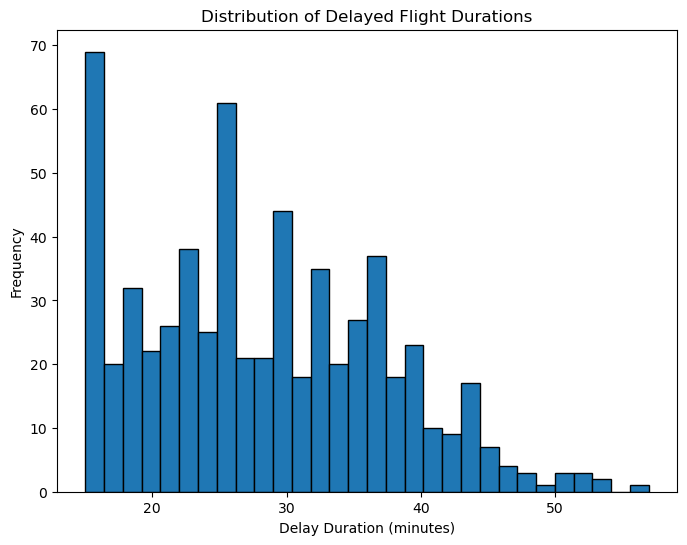

In [32]:
# Departure Delay histogram plot
delays = flight_info_df[flight_info_df["delayed"] == 1]["dep_delay"]

delays.plot.hist(
    bins=30,
    figsize=(8,6),
    edgecolor="black"
)

plt.title("Distribution of Delayed Flight Durations")
plt.xlabel("Delay Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

##### Key Trends

- **Right Skewed Distribution**: Most  delayed flights experience short delays (15-30 mins), with the frequency decreasing steadly as delay duration increases.
- **Long-Tail Behaviour**: A smaller number of flights experience significantly longer delays (40-60 mins).
- **High Density near the Minimum Delay Threshold**: The largest bar appears near 15 mins, which alligns with the project brief's definition of a "delay".

###### Interpretations

This indicates that while delays do happen, they tend to be short in duration, and extreme delays are less common.

##### Flight Distance

Lets create a scatter plot to visualise the length of each flight in the dataset.

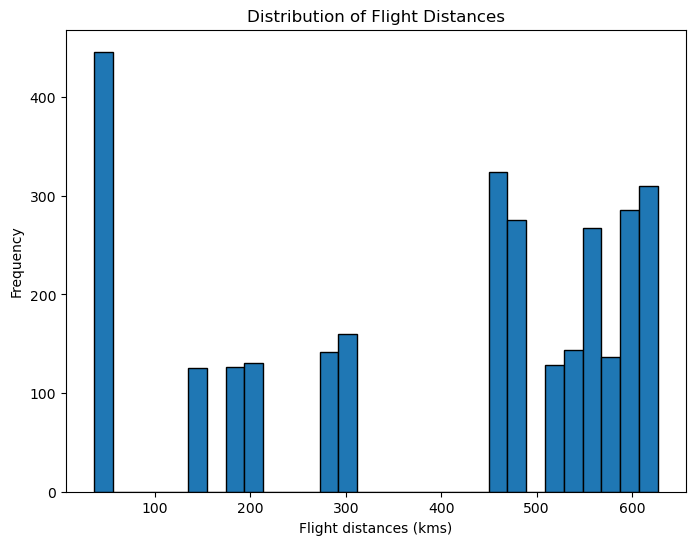

In [33]:
# Flight Distance scatter plot
flight_distances = flight_info_df["distance_km"]

flight_distances.plot.hist(
    bins=30,
    figsize=(8,6),
    edgecolor="black"
)

plt.title("Distribution of Flight Distances")
plt.xlabel("Flight distances (kms)")
plt.ylabel("Frequency")
plt.show()

##### Key Trends

- **Multimodal Distribution**: The plot shows distict clusters around certanin distance ranges. This is unsurprising since the dataset only contains flight data from flight between ireland and The United Kingdom.
- **Large Spike at the Shortest Distance Bin**: A very high count appears around the smallest distance group (50-75 kms), suggest heavy traffic on at least one short hall route.
- **Even Distribution in Mid-Range Distance**: Distances in the 200-650 km range appear evenly spread wil no single dominant value.

###### Interpretations
Flight operations in this dataset include a mix of distance ranges, with one particular short-haul route dominating traffic volume.

##### Flight Durations

Lets create a scatter plot to visualise the duration in minutes of each flight.

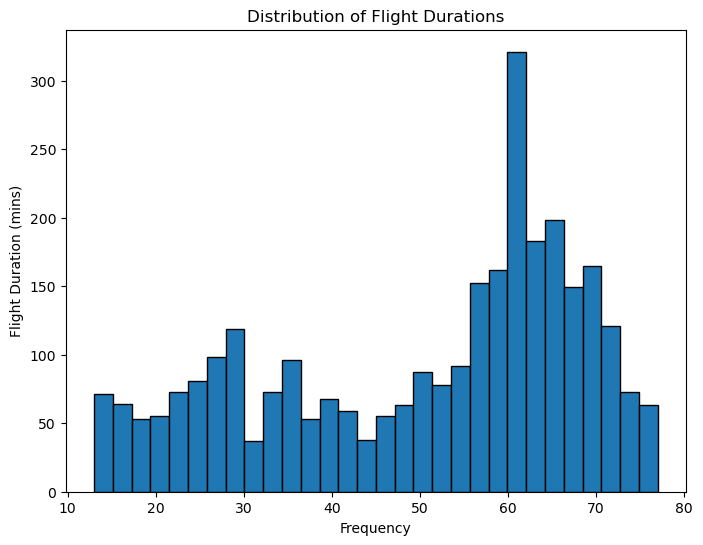

In [34]:
# Flight Duration scatter plot
flight_duration = flight_info_df["flight_duration_mins"]

# Define plot characterists
flight_duration.plot.hist(
    bins=30,
    figsize=(8,6),
    edgecolor="black"
)

# Define plot labels
plt.title("Distribution of Flight Durations")
plt.xlabel("Frequency")
plt.ylabel("Flight Duration (mins)")
plt.show()

##### Key Trends

- **Multimodal Structure**: The histogram shows clusters, indicating different categories of flights (Short and medium-haul). This correlates with the earlier distance distributions.
-  **Most distance fall between 50-75 minutes**: The bulk of flights appear to operate within a typical short and medium-haul time window.

###### Interpretation:
The dataset contains several distinct groups of flight durations, reflecting a diverse selection of routes in the dataset.

##### Wind levels

Lets create a bar chart to visualise the number of each wind lever

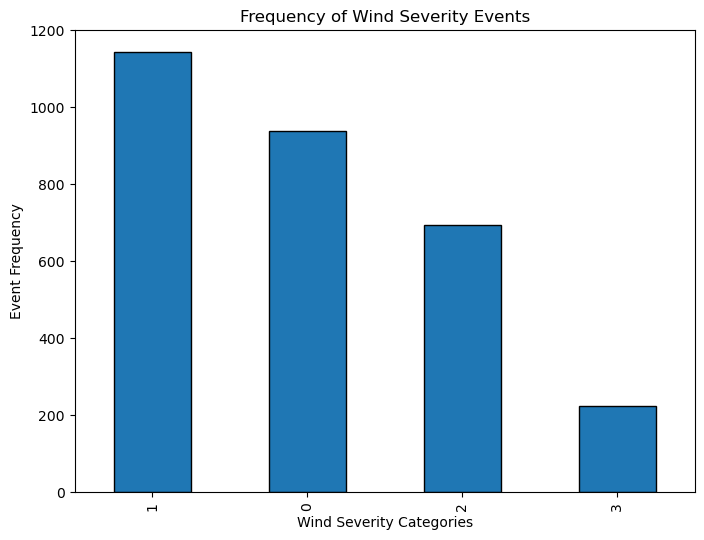

In [35]:
# Grab the number of occurances of each wind category
wind_level_counts = flight_info_df["wind"].value_counts()

wind_level_counts.plot.bar(
    figsize=(8,6),
    edgecolor="black"
)

plt.title("Frequency of Wind Severity Events")
plt.xlabel("Wind Severity Categories")
plt.ylabel("Event Frequency")
plt.show()

###### Key Trends

- **Calm and Breezy conditions dominate**: Categories 0 (“Calm”) and 1 (“Breezy”) are the most frequent of the wind severity events.
- **Strong Wind Conditions are Rare**: Wind levels 2 and 3 (“Windy” and “Very Windy”) occur far less frequently.
- **Inverse Relationship**: As wind severity increases, the number of events decreases.

###### Interpretation:
Most flights experience normal wind conditions. This is typical for aviation data, where extreme weather is rare but important because it can significantly impact delays.

##### Precipitation Levels

Lets create a bar chart to visualise the frequency of precipitation severity events.

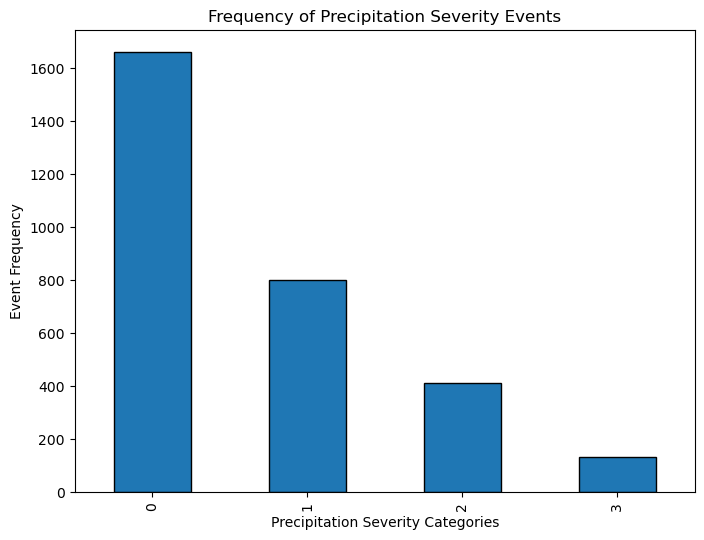

In [36]:
# Grab the number of occurances of each wind category
wind_level_counts = flight_info_df["precipitation"].value_counts()

wind_level_counts.plot.bar(
    figsize=(8,6),
    edgecolor="black"
)

plt.title("Frequency of Precipitation Severity Events")
plt.xlabel("Precipitation Severity Categories")
plt.ylabel("Event Frequency")
plt.show()
#print(wind_level_counts)

##### Key Trends

- **Dry Conditions dominate**: Precipitation level 0 accounts for the majority of observations.
- **Light Precipitation still Common**: Levels 1 and 2 appear noticeably but far less than 0.
- **Heavy Precipitation is Rare**: Level 3 has a very small count compared to others.


###### Interpretation

This distribution shows that **most flights operate under favourable weather**, with severe precipitation being uncommon. However, the rarer high-severity events are operationally important because they often correlate with higher delay rates.


#### Overall Interpretaion

Across all visualisations, the data shows:
- Most flight operate under normal weather conditions.
- Delays tend to be short, with only a minority experiencing significant delays.
- The dataset contains multiple routes.
- Severe weather is rare, but their influence on operations may become highly predictive in later analysis.

#### Future Modelling Work

This section will connect the observed trends to later classification work to be done.

##### Analysis for Future Modelling Work

The trends observed during data characterisation provide several insights that will guide the upcoming classification tasks. First, the moderate imbalance in the target variable (with roughly 80% of flights not delayed and 20% delayed) indicates that relying solely on accuracy of results would be a misleading form of evaluation. Instead, metrics such as precision, recall, F1-score, and ROC–AUC could be used to assess how effectively the models detect delayed flights.

The distributional patterns in flight durations and distances suggest that the dataset contains multiple types of routes (short-haul and medium-haul flights). These differences mean that features such as flight distance, scheduled duration, and route identifiers will likely carry predictive power. Their multimodal distributions also suggest that non-linear models (e.g. random forests) may capture these patterns more effectively than purely linear models.

Weather variables exhibit strong asymmetry, with the majority of flights operating in calm or dry conditions and only a small proportion encountering severe weather. Although rare, these high-severity events are likely to have a disproportionate impact on delays. This supports including derived features such as wind_level, precip_level, and the bad_weather flag in the predictive models. Their clear trends in the EDA suggest that they may become some of the most influential predictors in the feature importance analysis later on.

The analysis of delay durations showed a right-skewed distribution, with many delays clustering just above the 15-minute threshold. This implies that the classification task may involve distinguishing borderline delays from on-time flights—a scenario where probabilistic models like logistic regression can be particularly useful due to their calibrated output probabilities.

Finally, airport- and carrier-level variations (e.g., busiest airports showing more delays or specific carriers exhibiting better on-time performance) point to the value of engineered features such as airport traffic counts, average carrier delay, and route-level encodings. These aggregated features will allow the models to capture structural tendencies in the data that individual per-flight variables might miss.

Overall, the trends observed in the characterisation phase strongly motivate the choice of features and models for the classification tasks. They highlight the need for a combination of interpretable models (e.g. logistic regression) and more flexible non-linear models (e.g. random forests or gradient boosting) to effectively capture both linear relationships and more complex interactions present in the data. This EDA therefore forms a foundation for designing an informed and effective modelling strategy in the subsequent stages of the assignment.

## Task 2: Classification & Evaluation

In [82]:
# Lets quickly import all the necessary libraries to create and evaluate the classification algorithms
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

### Classification Algorithm 1: Linear Regression Classification

#### Introduction to Linear Regression

Lets begin briefly with a description of the Linear Regression Classification algorithm and how it cam be applied to the dataset to predict departure delays. 

##### What is Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a straight line to the data. Linear Regression assmumes (while almost never the case) a linear relationship between the dependent variable, and the one or more independent variables, meaining that as the independent variable(s) change, the dependent variable changes in a predictable, straight-line manner. The model's goal is to find the line that best represents the data, allowing for predections about the dependent variable based on the values of the independent variables.

In the case of this task, linear regression can be used to predict the departure delay (dependent variable) based on one or more independent variables. Lets now determine the independent variables to be used in the linear regression model.

In [38]:
# Define a list of features to use in the linear regression classifier.
feature_columns = [
    "distance_km",
    "flight_duration_mins",
    "wind",
    "precipitation",
    "bad_weather",
    "departure_hour",
    "departure_dayofweek",
    "origin_flight_count",
]

# Features
X = flight_info_df[feature_columns]

# Target Variable
y = flight_info_df["dep_delay"]

#### Splitting Data

In [39]:
# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Scale Numeric Features

In [40]:
# Initiate StandardScaler.
scaler = StandardScaler()

# Fit and transform the training data.
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

#### Train the Linear Regression Model

In [41]:
# Create a LinearRegression object.
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Making Predictions

In [42]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

#### Evaluating Model Performance

In [43]:
# Calculate and print errors.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.0527
Mean squared error: 120.6820
Root mean squared error: 10.9855


#### View Scaled Coefficients

In [44]:
coef_scaled = pd.DataFrame({
    "Feature": feature_columns,
    "Coefficient (scaled)": model.coef_
}).sort_values(by="Coefficient (scaled)", ascending=False)

coef_scaled

,Feature,Coefficient (scaled)
2,wind,1.433282
3,precipitation,1.041623
4,bad_weather,0.396056
0,distance_km,0.318442
6,departure_dayofweek,0.140283
5,departure_hour,-0.011586
1,flight_duration_mins,-0.194904
7,origin_flight_count,-0.597089


### Logistical Regression Evalutation

### Logistical Regression

Linear regression as we have seen above has performed poorly. Before progressing onto the second classifier algorithm lets take a Logistical Regression approach. Logistical regression is a statistical method for predicting binary classes (e.g "yes" or "no", "True" or "False" etc). Logistical Regression uses a sigmoid function that produces an "s" shaped curve that can take any real-valued number and map it to a value between 0 and 1. If the output of the sigmoid function is > 0.5, the outcome is classified as 1 or Yes, while if the output of the sigmoid function is < 0.5 then, the outcome is classified as 0 or No.

Since the Linear regression model performed poorly at predicting exact delays in minutes, lets apply a Logistical regression model to see if it can accuratly classify flights as delayed or not delayed.

#### Selecting Features

Lets define the features to use in the logistical regression model.

In [73]:
# Define the list of features to use in the Logistical Regression Model
logistical_regression_feature_columns = [
    "distance_km",
    "precipitation",
    "bad_weather",
    "departure_hour",
    "departure_dayofweek",
]

#### Define Target Variable and Features

Let's now create two dataframes to represent the target variable and the features.

In [74]:
# Define the dataframe containing features
X = flight_info_df[logistical_regression_feature_columns]

# Define the dataframe containing the target variables.
y = flight_info_df.delayed

#### Splitting Data

Lets split the dataset into 80%, to be used to train the model, and 20%, to be used to test and evaluate the model. 

In [75]:
# Define a 80% training set and a 20% testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

#### Model Development and Prediction

Lets now define and train the logistical regression model.

In [78]:
logistical_regression_model = LogisticRegression(random_state=16)

logistical_regression_model.fit(X_train, y_train)

y_pred = logistical_regression_model.predict(X_test)

#### Model Evaluation

Lets create a confusion matrix to visualise the outcomes of the model.

-------- Delay Classification report --------


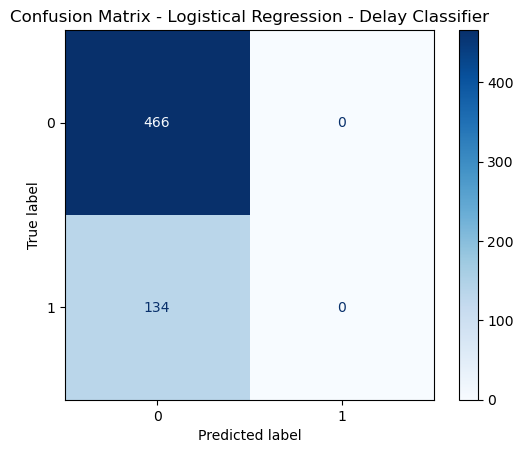

In [86]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=logistical_regression_model.classes_)
target_names = ["No Delay", "Delay"]
print("-------- Delay Classification report --------")
#print(classification_report(y_test,y_pred))



confusion_matrix_display.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistical Regression - Delay Classifier")
plt.show()

### Classification Algorithm 2: K-Nearest Neighbours Classification

In [49]:
feature_columns = [
    "distance_km",
    "flight_duration_mins",
    "wind",
    "precipitation",
    "bad_weather",
    "departure_hour",
    "departure_dayofweek",
    "origin_flight_count",
]


In [50]:
X = flight_info_df[feature_columns] # 
y = flight_info_df["delayed"]   # 0 or 1

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [54]:
y_pred = knn.predict(X_test_scaled)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
print("Confusion Matrix:\n", cm)

Accuracy: 0.757
Precision: 0.255
Recall: 0.098
F1 Score: 0.141
Confusion Matrix:
 [[442  35]
 [111  12]]


In [56]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]
print("Best K =", optimal_k)

Best K = 18


In [57]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18)

In [58]:
y_pred = knn.predict(X_test_scaled)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))
#print("Confusion Matrix:\n", cm)

Accuracy: 0.793
Precision: 0.444
Recall: 0.033
F1 Score: 0.061


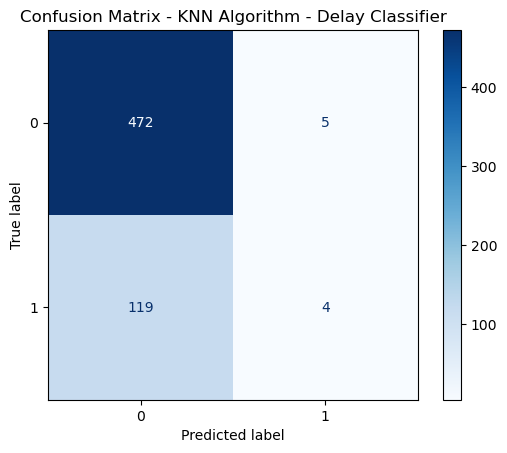

In [60]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=knn.classes_)
confusion_matrix_display.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN Algorithm - Delay Classifier")
plt.show()

#### Introduction to K-Nearest Neighbours

### K-Nearest Neighbours Evaluation

### Classification Algorithm 3: Decision Trees Classification

In [61]:
feature_columns = [
    "distance_km",
    "flight_duration_mins",
    "wind",
    "precipitation",
    "bad_weather",
    "departure_hour",
    "departure_dayofweek",
    "origin_flight_count",
]


In [62]:
X = flight_info_df[feature_columns]
y = flight_info_df["delayed"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [63]:
dt = DecisionTreeClassifier(
    criterion="gini",     # or "entropy"
    max_depth=None,       # allow full depth
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = dt.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1 Score:", round(f1, 3))

Accuracy: 0.708
Precision: 0.287
Recall: 0.285
F1 Score: 0.286


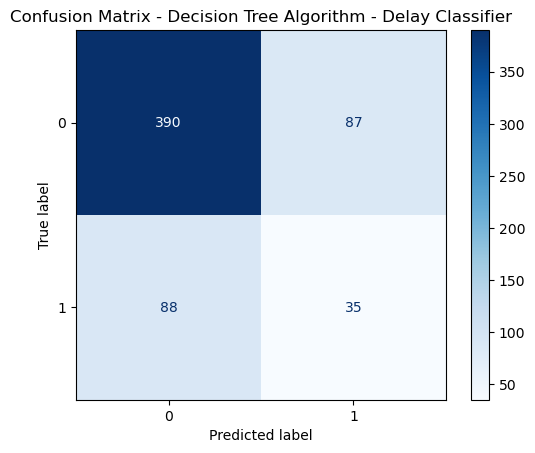

In [66]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=dt.classes_)
confusion_matrix_display.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Algorithm - Delay Classifier")
plt.show()

In [67]:
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:
dt_best = grid.best_estimator_
y_pred_best = dt_best.predict(X_test)

In [69]:
print("Improved F1:", f1_score(y_test, y_pred_best))

Improved F1: 0.2857142857142857


In [70]:
importances = pd.DataFrame({
    "Feature": feature_columns,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances

,Feature,Importance
1,flight_duration_mins,0.251762
5,departure_hour,0.234759
0,distance_km,0.159046
6,departure_dayofweek,0.115811
7,origin_flight_count,0.090231
2,wind,0.068445
4,bad_weather,0.040260
3,precipitation,0.039685


#### Introduction to Decision Trees 

### Decision Trees Evaluation

## Task 3: Predictive Feature Analysis